### Predictive Analytics for Healthcare
Develop a machine learning model to predict the likelihood of heart disease in patients 
based on comprehensive patient data. 

In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle



In [3]:
#importing dataset
pd.read_csv('project1_data.csv')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,typical angina,125.0,212.0,less than 120mg/ml,ST-T wave abnormality,168.0,no,1.0,downsloping,2.0,NaN,0
1,53.0,1.0,typical angina,140.0,203.0,greater than 120mg/ml,normal,155.0,yes,3.1,upsloping,0.0,NaN,0
2,70.0,1.0,typical angina,145.0,174.0,less than 120mg/ml,ST-T wave abnormality,125.0,yes,2.6,NaN,0.0,NaN,0
3,61.0,1.0,typical angina,148.0,203.0,less than 120mg/ml,ST-T wave abnormality,161.0,no,0.0,downsloping,1.0,NaN,0
4,62.0,0.0,typical angina,138.0,294.0,greater than 120mg/ml,ST-T wave abnormality,NaN,NaN,1.9,flat,3.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,atypical angina,140.0,221.0,less than 120mg/ml,ST-T wave abnormality,164.0,yes,0.0,downsloping,0.0,reversible defect,1
1021,60.0,1.0,typical angina,125.0,258.0,less than 120mg/ml,normal,141.0,yes,NaN,flat,1.0,NaN,0
1022,47.0,1.0,typical angina,NaN,275.0,less than 120mg/ml,normal,NaN,yes,1.0,flat,1.0,reversible defect,0
1023,50.0,NaN,typical angina,110.0,254.0,less than 120mg/ml,normal,159.0,no,0.0,downsloping,0.0,reversible defect,1


In [4]:
#saving the dataset into a variable
df = pd.read_csv('project1_data.csv')

### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       995 non-null    float64
 1   sex       995 non-null    float64
 2   cp        995 non-null    object 
 3   trestbps  995 non-null    float64
 4   chol      995 non-null    float64
 5   fbs       995 non-null    object 
 6   restecg   995 non-null    object 
 7   thalach   995 non-null    float64
 8   exang     995 non-null    object 
 9   oldpeak   995 non-null    float64
 10  slope     995 non-null    object 
 11  ca        995 non-null    float64
 12  thal      599 non-null    object 
 13  target    1025 non-null   int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 112.2+ KB


In [6]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,typical angina,125.0,212.0,less than 120mg/ml,ST-T wave abnormality,168.0,no,1.0,downsloping,2.0,NaN,0
1,53.0,1.0,typical angina,140.0,203.0,greater than 120mg/ml,normal,155.0,yes,3.1,upsloping,0.0,NaN,0
2,70.0,1.0,typical angina,145.0,174.0,less than 120mg/ml,ST-T wave abnormality,125.0,yes,2.6,NaN,0.0,NaN,0
3,61.0,1.0,typical angina,148.0,203.0,less than 120mg/ml,ST-T wave abnormality,161.0,no,0.0,downsloping,1.0,NaN,0
4,62.0,0.0,typical angina,138.0,294.0,greater than 120mg/ml,ST-T wave abnormality,NaN,NaN,1.9,flat,3.0,NaN,0
5,NaN,0.0,typical angina,100.0,248.0,less than 120mg/ml,normal,122.0,no,1.0,flat,0.0,reversible defect,1
6,58.0,1.0,typical angina,114.0,318.0,less than 120mg/ml,left ventricular hypertrophy,140.0,no,4.4,upsloping,3.0,fixed defect,0
7,55.0,1.0,typical angina,160.0,289.0,less than 120mg/ml,normal,145.0,yes,0.8,flat,1.0,NaN,0
8,46.0,1.0,typical angina,120.0,249.0,less than 120mg/ml,normal,144.0,no,0.8,downsloping,0.0,NaN,0
9,54.0,1.0,typical angina,122.0,286.0,less than 120mg/ml,normal,116.0,yes,3.2,flat,2.0,reversible defect,0


In [7]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58.0,1.0,typical angina,128.0,216.0,less than 120mg/ml,normal,131.0,yes,2.2,flat,3.0,NaN,0
1016,65.0,1.0,asymptomatic,138.0,282.0,greater than 120mg/ml,normal,174.0,no,1.4,flat,1.0,reversible defect,0
1017,53.0,1.0,NaN,123.0,282.0,less than 120mg/ml,ST-T wave abnormality,95.0,yes,2.0,flat,2.0,NaN,0
1018,41.0,1.0,typical angina,110.0,172.0,less than 120mg/ml,normal,158.0,no,0.0,downsloping,0.0,NaN,0
1019,47.0,NaN,typical angina,112.0,204.0,less than 120mg/ml,ST-T wave abnormality,143.0,no,0.1,downsloping,0.0,reversible defect,1
1020,59.0,1.0,atypical angina,140.0,221.0,less than 120mg/ml,ST-T wave abnormality,164.0,yes,0.0,downsloping,0.0,reversible defect,1
1021,60.0,1.0,typical angina,125.0,258.0,less than 120mg/ml,normal,141.0,yes,NaN,flat,1.0,NaN,0
1022,47.0,1.0,typical angina,NaN,275.0,less than 120mg/ml,normal,NaN,yes,1.0,flat,1.0,reversible defect,0
1023,50.0,NaN,typical angina,110.0,254.0,less than 120mg/ml,normal,159.0,no,0.0,downsloping,0.0,reversible defect,1
1024,54.0,1.0,typical angina,120.0,188.0,less than 120mg/ml,ST-T wave abnormality,113.0,no,1.4,flat,1.0,NaN,0


In [8]:
df.shape

(1025, 14)

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
#checking for missing values
df.isnull().sum()

age          30
sex          30
cp           30
trestbps     30
chol         30
fbs          30
restecg      30
thalach      30
exang        30
oldpeak      30
slope        30
ca           30
thal        426
target        0
dtype: int64

In [11]:
#filling missing values in numerical columns with mean


In [12]:
df.dtypes

age         float64
sex         float64
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
target        int64
dtype: object

In [13]:
df['age'].value_counts()

age
58.0    67
57.0    55
54.0    50
59.0    45
52.0    40
51.0    39
60.0    37
62.0    36
56.0    36
64.0    33
44.0    33
63.0    31
67.0    31
61.0    30
41.0    29
55.0    29
65.0    27
42.0    26
53.0    26
43.0    26
66.0    25
45.0    24
46.0    22
48.0    21
50.0    21
47.0    17
49.0    17
35.0    15
70.0    14
39.0    14
38.0    12
68.0    12
71.0    11
40.0    11
69.0     9
37.0     6
34.0     6
29.0     3
77.0     3
76.0     3
74.0     3
Name: count, dtype: int64

In [14]:
df['age'] = df['age'].fillna(0).astype(int)

In [15]:
df['age'].isna().sum()

0

In [16]:
data = {
    'fbs': ['less than 120mg/ml', 140, 160, None, 120],
}
df = pd.read_csv('project1_data.csv')

# Convert 'fbs' column to numeric, coerce errors to NaN
df['fbs'] = pd.to_numeric(df['fbs'], errors='coerce')

# Fill missing values with the median of the column
df['fbs'] = df['fbs'].fillna(df['fbs'].median())

print(df)

       age  sex               cp  trestbps   chol  fbs                restecg  \
0     52.0  1.0   typical angina     125.0  212.0  NaN  ST-T wave abnormality   
1     53.0  1.0   typical angina     140.0  203.0  NaN                 normal   
2     70.0  1.0   typical angina     145.0  174.0  NaN  ST-T wave abnormality   
3     61.0  1.0   typical angina     148.0  203.0  NaN  ST-T wave abnormality   
4     62.0  0.0   typical angina     138.0  294.0  NaN  ST-T wave abnormality   
...    ...  ...              ...       ...    ...  ...                    ...   
1020  59.0  1.0  atypical angina     140.0  221.0  NaN  ST-T wave abnormality   
1021  60.0  1.0   typical angina     125.0  258.0  NaN                 normal   
1022  47.0  1.0   typical angina       NaN  275.0  NaN                 normal   
1023  50.0  NaN   typical angina     110.0  254.0  NaN                 normal   
1024  54.0  1.0   typical angina     120.0  188.0  NaN  ST-T wave abnormality   

      thalach exang  oldpea

In [17]:
df.dtypes

age         float64
sex         float64
cp           object
trestbps    float64
chol        float64
fbs         float64
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
target        int64
dtype: object

In [18]:
df['fbs'].value_counts()

Series([], Name: count, dtype: int64)

In [19]:
df['fbs'] = df['fbs'].fillna(0).astype(int)

In [20]:
df['fbs'].isna().sum()

0

In [21]:
# Define a mapping of non-numeric categories to integers
category_mapping = {
    'typical angina': 1,
    'atypical angina': 2,
    'non-anginal pain': 3,
    'asymptomatic': 4
}

# Replace non-numeric values with their corresponding integers
df['cp'] = df['cp'].replace(category_mapping)

# Fill missing values with 0 (if any)
df['cp'] = df['cp'].fillna(0)

# Convert the column to integer type
df['cp'] = df['cp'].astype(int)

In [22]:
df['cp'].value_counts()

cp
1    478
3    277
2    166
4     74
0     30
Name: count, dtype: int64

In [23]:
df['cp'] = df['cp'].fillna(0).astype(int)

In [24]:
df['cp'].isna().sum()

0

In [25]:
df['restecg'].value_counts()

restecg
ST-T wave abnormality           496
normal                          484
left ventricular hypertrophy     15
Name: count, dtype: int64

In [32]:
df.restecg.mode()[0]

'ST-T wave abnormality'

In [33]:
most_restecg = df.restecg.mode()[0]

In [34]:
df.restecg = df.restecg.fillna(most_restecg)

In [35]:
df.restecg.isna().sum()

0

In [36]:
df.exang.value_counts()

exang
no     662
yes    333
Name: count, dtype: int64

In [37]:
df.exang.mode()[0]

'no'

In [38]:
most_exang = df.exang.mode()[0]

In [39]:
df.exang = df.exang.fillna(most_exang)

In [40]:
df.exang.isna().sum()

0

In [41]:
df.slope.value_counts()

slope
flat           468
downsloping    457
upsloping       70
Name: count, dtype: int64

In [42]:
df.slope.mode()[0]

'flat'

In [43]:
most_slope = df.slope.mode()[0]

In [44]:
df.slope = df.slope.fillna(most_slope)

In [45]:
df.slope.isna().sum()

0

In [47]:
df.thal.mode()[0]

'reversible defect'

In [49]:
most_thal = df.thal.mode()[0]

In [50]:
df.thal = df.thal.fillna(most_thal)

In [51]:
df.thal.isna().sum()

0

In [52]:
df.isna().sum()

age         30
sex         30
cp           0
trestbps    30
chol        30
fbs          0
restecg      0
thalach     30
exang        0
oldpeak     30
slope        0
ca          30
thal         0
target       0
dtype: int64

In [53]:
df.age.value_counts()

age
58.0    67
57.0    55
54.0    50
59.0    45
52.0    40
51.0    39
60.0    37
62.0    36
56.0    36
64.0    33
44.0    33
63.0    31
67.0    31
61.0    30
41.0    29
55.0    29
65.0    27
42.0    26
53.0    26
43.0    26
66.0    25
45.0    24
46.0    22
48.0    21
50.0    21
47.0    17
49.0    17
35.0    15
70.0    14
39.0    14
38.0    12
68.0    12
71.0    11
40.0    11
69.0     9
37.0     6
34.0     6
29.0     3
77.0     3
76.0     3
74.0     3
Name: count, dtype: int64

In [54]:
int(df.age.mean())

54

In [55]:
age_mean = int(df.age.mean())

In [56]:
df.age = df.age.fillna(age_mean)

In [57]:
df['age'].isna().sum()

0

In [59]:
df.sex.value_counts

<bound method IndexOpsMixin.value_counts of 0       1.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1020    1.0
1021    1.0
1022    1.0
1023    NaN
1024    1.0
Name: sex, Length: 1025, dtype: float64>

In [60]:
df.sex.mode()[0]

1.0

In [61]:
most_sex = df.sex.mode()[0]

In [62]:
df.sex = df.sex.fillna(most_sex)

In [63]:
df['sex'].isna().sum()

0

In [65]:
df.trestbps.value_counts()

trestbps
120.0    124
130.0    118
140.0    104
110.0     62
150.0     54
138.0     43
128.0     38
125.0     36
160.0     33
112.0     30
132.0     27
118.0     23
108.0     21
135.0     20
124.0     19
134.0     17
152.0     17
145.0     16
170.0     15
100.0     14
122.0     12
136.0     11
126.0     10
180.0     10
142.0      9
115.0      9
105.0      9
146.0      8
178.0      7
148.0      7
94.0       7
102.0      6
144.0      6
154.0      4
123.0      4
117.0      4
200.0      4
165.0      4
156.0      3
164.0      3
172.0      3
155.0      3
114.0      3
192.0      3
106.0      3
104.0      3
129.0      3
174.0      3
101.0      3
Name: count, dtype: int64

In [66]:
int(df.trestbps.mean())

131

In [67]:
trestbps_mean = int(df.trestbps.mean())

In [68]:
df.trestbps = df.trestbps.fillna(trestbps_mean)

In [70]:
df.chol.value_counts()

chol
234.0    20
197.0    19
204.0    19
212.0    18
254.0    17
         ..
409.0     3
200.0     3
306.0     3
141.0     3
242.0     2
Name: count, Length: 152, dtype: int64

In [71]:
int(df.chol.mean())

245

In [72]:
chol_mean = int(df.chol.mean())

In [73]:
df.chol = df.chol.fillna(chol_mean)

In [74]:
df.thalach.value_counts()

thalach
162.0    35
160.0    30
163.0    28
152.0    28
173.0    27
         ..
118.0     3
167.0     3
194.0     2
106.0     2
192.0     2
Name: count, Length: 91, dtype: int64

In [75]:
int(df.thalach.mean())

149

In [76]:
thalach_mean = int(df.thalach.mean())

In [78]:
df.thalach = df.thalach.fillna(thalach_mean)

In [79]:
df.oldpeak.value_counts()

oldpeak
0.0    321
1.2     56
1.0     49
0.6     45
0.8     44
1.4     43
0.2     37
1.8     36
1.6     35
0.4     28
2.0     27
0.1     23
2.8     21
2.6     20
3.0     17
1.9     16
1.5     15
0.5     15
3.6     15
2.2     13
4.0     12
2.4     11
0.3     10
0.9     10
3.4     10
3.2      8
2.3      7
2.5      7
4.2      6
1.1      6
5.6      4
4.4      4
3.8      4
1.3      3
3.5      3
2.1      3
6.2      3
3.1      3
0.7      3
2.9      2
Name: count, dtype: int64

In [80]:
int(df.oldpeak.mean())

1

In [81]:
oldpeak_mean = int(df.oldpeak.mean())

In [82]:
df.oldpeak = df.oldpeak.fillna(oldpeak_mean)

In [83]:
df.ca.value_counts()

ca
0.0    557
1.0    223
2.0    130
3.0     67
4.0     18
Name: count, dtype: int64

In [84]:
int(df.ca.mean())

0

In [85]:
ca_mean = int(df.ca.mean())

In [86]:
df.ca = df.ca.fillna(ca_mean)

In [87]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Patients Demograph

C:\Users\jacob.ojo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


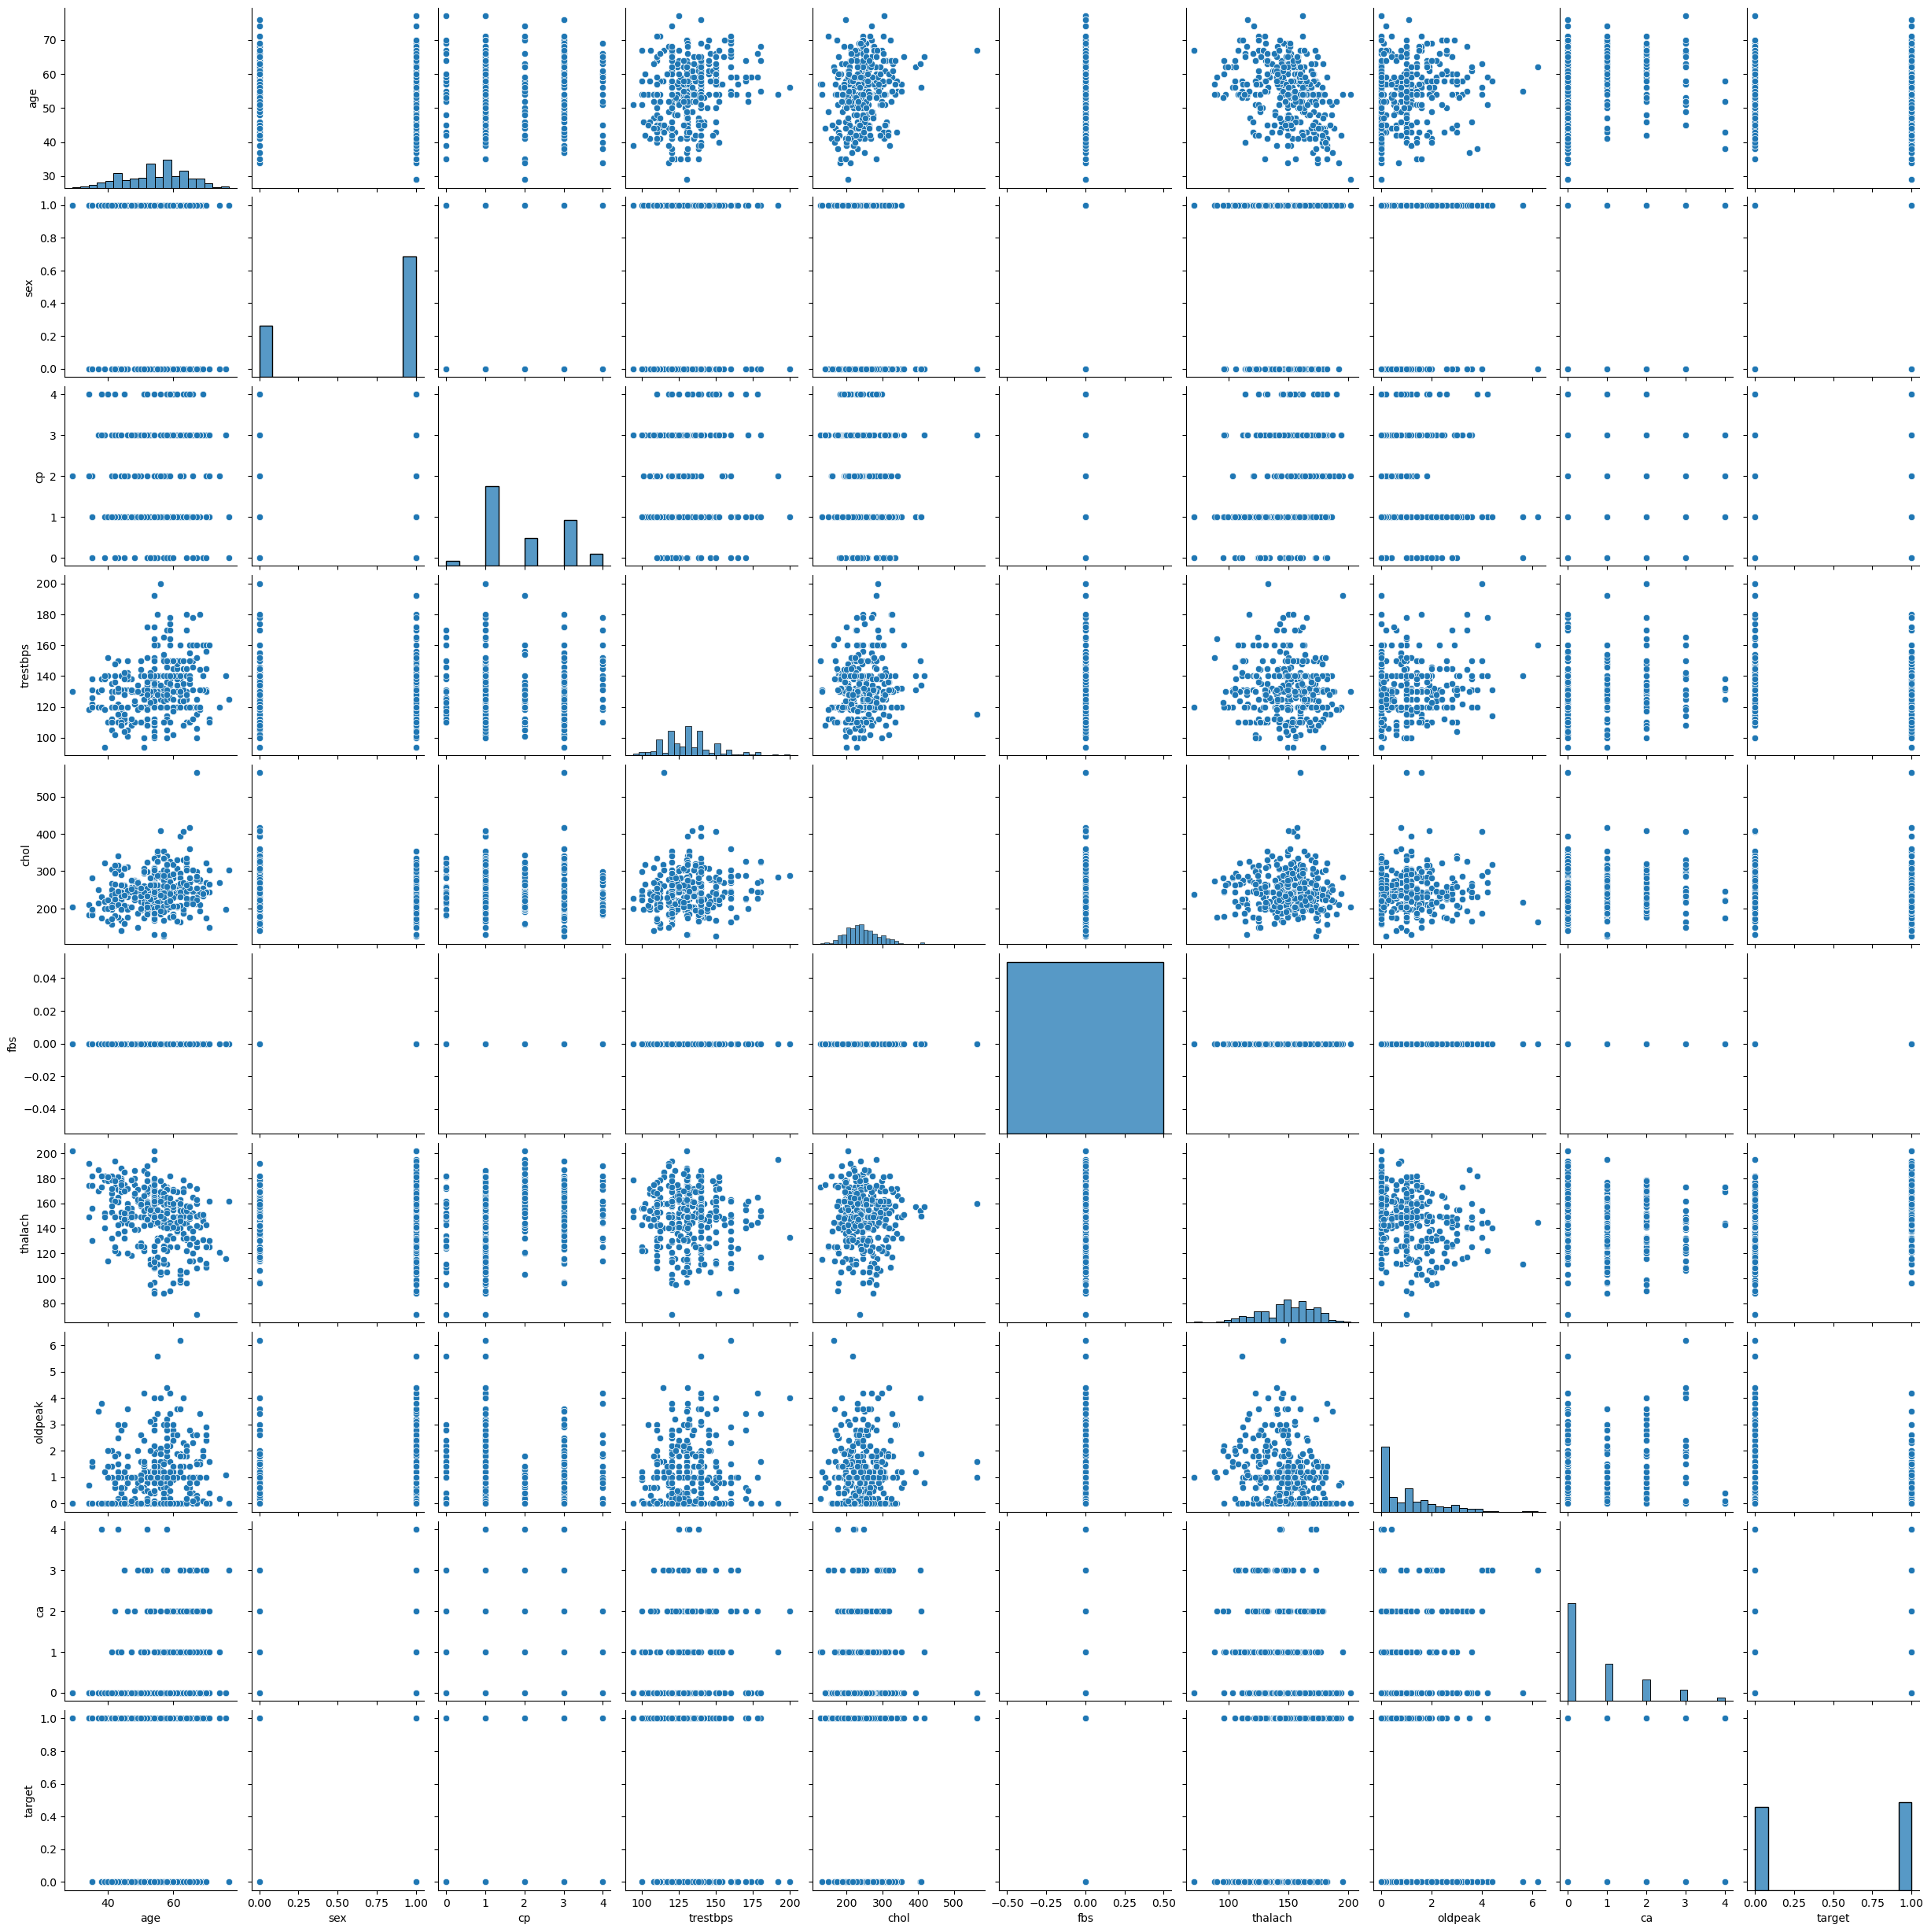

In [89]:
sns.pairplot(df, kind='scatter')

In [90]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

C:\Users\jacob.ojo\AppData\Local\Temp\ipykernel_4984\10222279.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=0, ha='right')


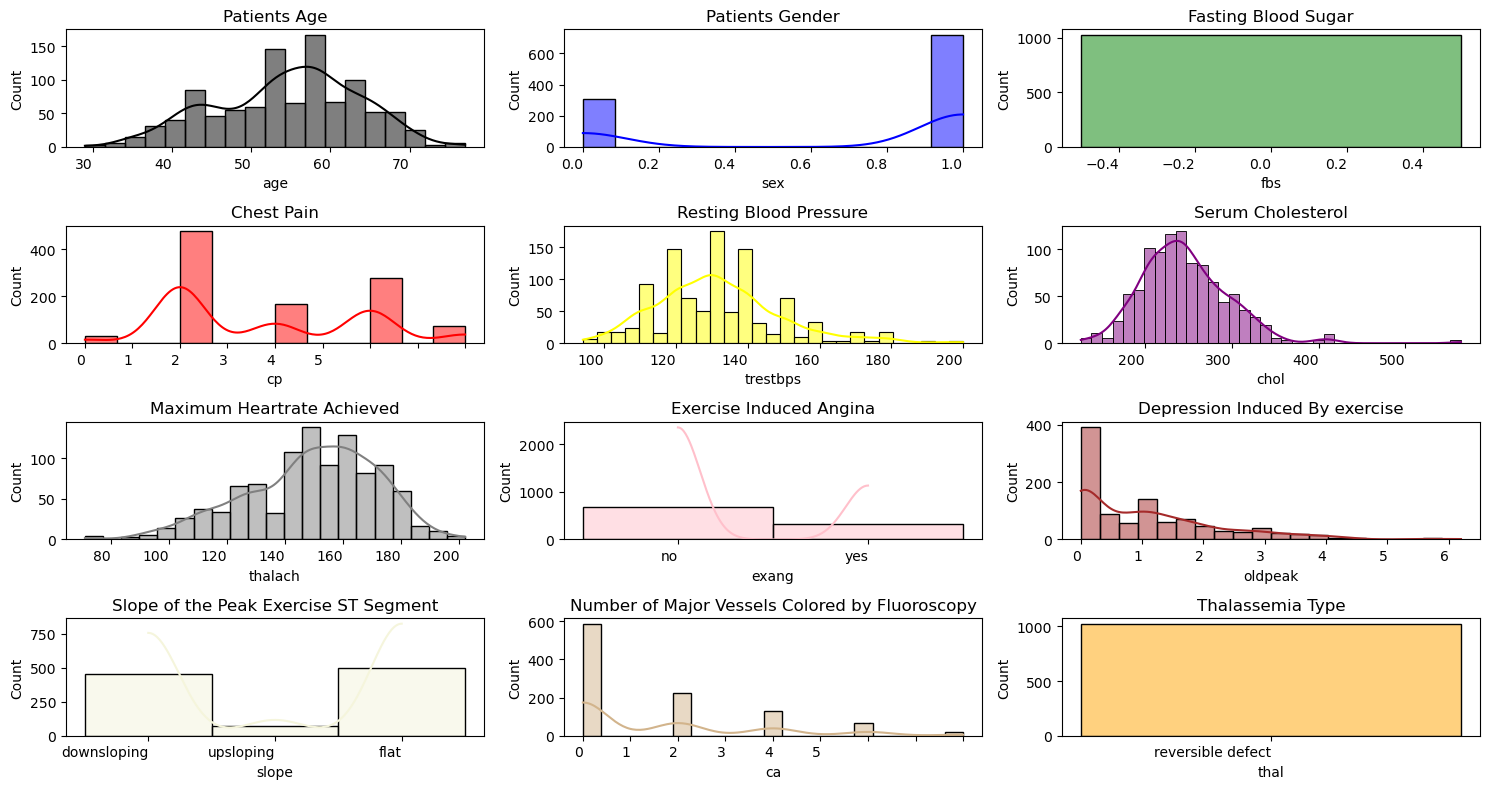

In [112]:
fig, ax = plt.subplots(4,3, figsize=(15,8))

sns.histplot(x='age', kde=True, data=df, color='black', ax=ax[0,0]).set_title('Patients Age')
sns.histplot(x='sex', kde=True, data=df, color='blue', ax=ax[0,1]).set_title('Patients Gender')
sns.histplot(x='fbs', kde=True, data=df, color='green', ax=ax[0,2]).set_title('Fasting Blood Sugar')
sns.histplot(x='cp', kde=True, data=df, color='Red', ax=ax[1,0]).set_title('Chest Pain')
sns.histplot(x='trestbps', kde=True, data=df, color='yellow', ax=ax[1,1]).set_title('Resting Blood Pressure')
sns.histplot(x='chol', kde=True, data=df, color='purple', ax=ax[1,2]).set_title('Serum Cholesterol')
sns.histplot(x='thalach', kde=True, data=df, color='gray', ax=ax[2,0]).set_title('Maximum Heartrate Achieved')
sns.histplot(x='exang', kde=True, data=df, color='pink', ax=ax[2,1]).set_title('Exercise Induced Angina')
sns.histplot(x='oldpeak', kde=True, data=df, color='brown', ax=ax[2,2]).set_title('Depression Induced By exercise')
sns.histplot(x='slope', kde=True, data=df, color='beige', ax=ax[3,0]).set_title('Slope of the Peak Exercise ST Segment')
sns.histplot(x='ca', kde=True, data=df, color='tan', ax=ax[3,1]).set_title('Number of Major Vessels Colored by Fluoroscopy')
sns.histplot(x='thal', kde=True, data=df, color='orange', ax=ax[3,2]).set_title('Thalassemia Type')

for axes_row in ax:
        for axes in axes_row:
                if axes is not None:
                        axes.set_xticklabels(axes.get_xticklabels(), rotation=0, ha='right')
                        axes.set_title(axes.get_title(), fontsize=12)
        
plt.tight_layout()
plt.show()

### Box plot of numerical columns in the predictive analytics for healthcare

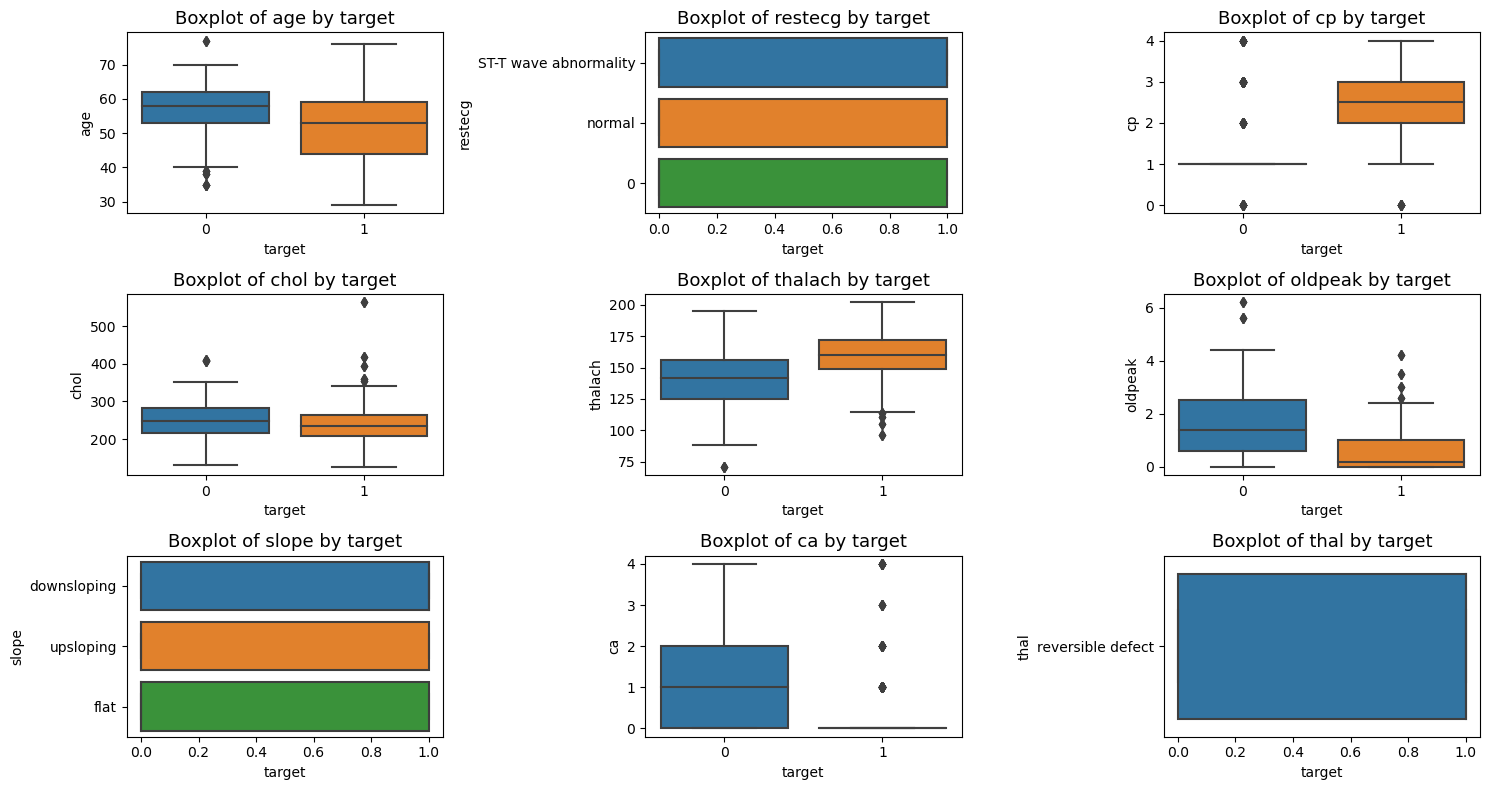

In [117]:
num_var = []

num_var =['age','restecg','cp','chol','thalach','oldpeak','slope','ca','thal']

fig, axs=plt.subplots(3,3,figsize=(15,8))
axs=axs.flatten()

for i, var in enumerate(num_var):
    sns.boxplot(y=var, x='target', data=df, ax=axs[i])
    axs[i].set_title(f"Boxplot of {var} by target", fontsize=13)
fig.tight_layout()


plt.show()

### Statistical description of the dataset


In [121]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,thalach,oldpeak,ca,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.0,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.512195,0.700488,1.889756,131.610732,245.956098,0.0,149.067317,1.065561,0.737561,0.513171
std,8.955734,0.458268,1.063668,17.361553,51.043534,0.0,22.594514,1.162657,1.025269,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.0,71.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,1.000000,120.000000,211.000000,0.0,133.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,242.000000,0.0,152.000000,0.800000,0.000000,1.000000
75%,61.000000,1.000000,3.000000,140.000000,274.000000,0.0,165.000000,1.600000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,0.0,202.000000,6.200000,4.000000,1.000000


### Correlation Plot

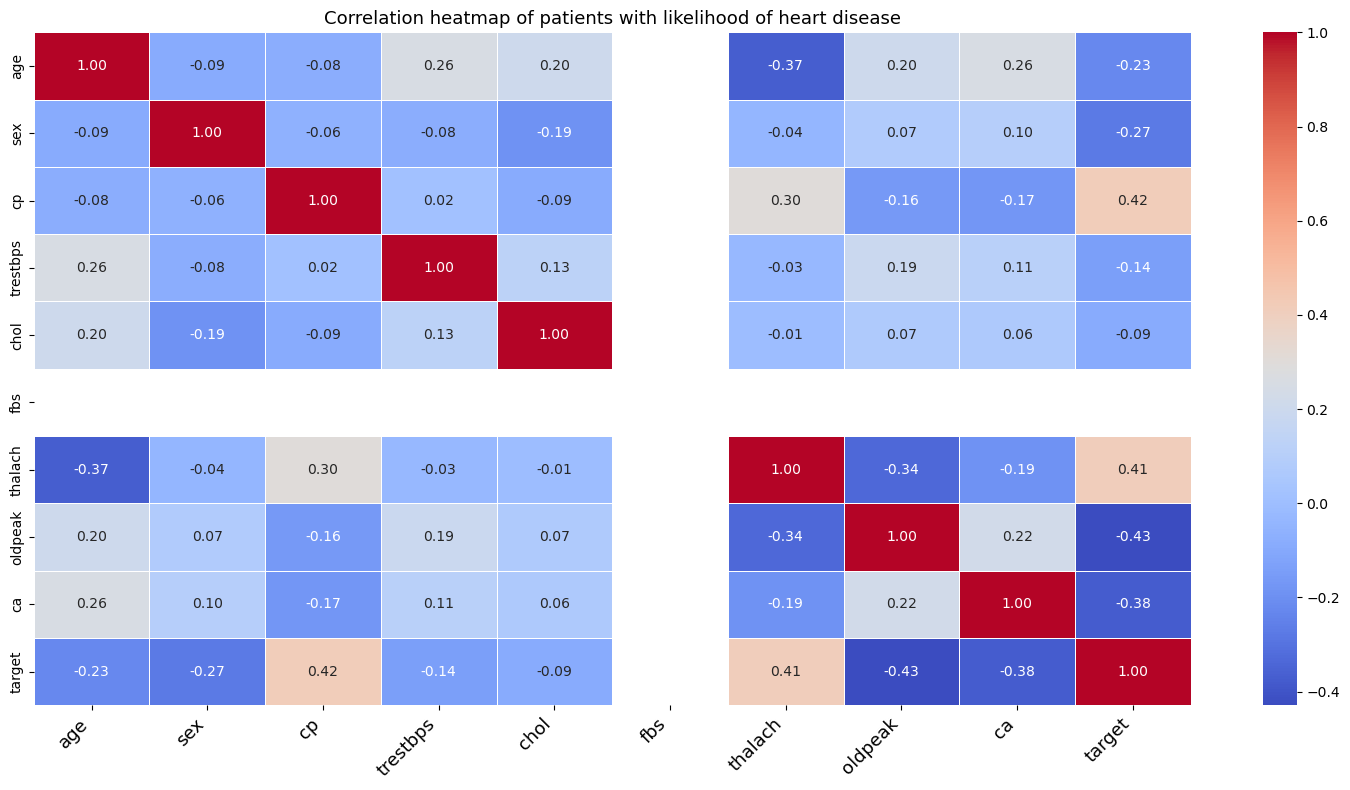

In [123]:
num_var = df.select_dtypes(include='number')

plt.figure(figsize=(15,8))
sns.heatmap(num_var.corr(), linewidths=0.5 ,annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation heatmap of patients with likelihood of heart disease', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=13)

plt.tight_layout()
plt.show()

### Data Preprocessing

In [126]:
pip install scikit-optimize

   ---------------------------------------- 0.0/107.7 kB ? eta -:--:--
   --- ------------------------------------ 10.2/107.7 kB ? eta -:--:--
   --- ------------------------------------ 10.2/107.7 kB ? eta -:--:--
   ----------- --------------------------- 30.7/107.7 kB 325.1 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/107.7 kB 325.1 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/107.7 kB 178.6 kB/s eta 0:00:01
   ---------------------- ---------------- 61.4/107.7 kB 233.8 kB/s eta 0:00:01
   ------------------------- ------------- 71.7/107.7 kB 261.4 kB/s eta 0:00:01
   -------------------------------------- 107.7/107.7 kB 311.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from skopt.space import Real, Categorical, Integer
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

### Label encode categorical variables

In [138]:
# Convert all values in the column to numbers
df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

In [141]:
# Apply label encoding to categorical columns
label_encoder = preprocessing.LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

### Standard Scaler

In [143]:
#Feature scaling:is a preprocessing technique used in machine learning to standardize the range of independent features or variables in the data.
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

### Train Test Split

In [148]:
x = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [150]:
print('Testing set:', x_test.shape, y_test.shape)
print('Training set:', x_train.shape, y_train.shape)

Testing set: (205, 13) (205,)
Training set: (820, 13) (820,)


In [151]:
y_train.info()

x_train.columns

<class 'pandas.core.series.Series'>
Index: 820 entries, 835 to 860
Series name: target
Non-Null Count  Dtype
--------------  -----
820 non-null    int64
dtypes: int64(1)
memory usage: 12.8 KB


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

### Model Selection
For predicting the diabetes outcome of patients. I'll be using the following Machine Learning algorithm.

1 Logistic Regression
2 XGBoost Classifier

In [153]:
log_model = LogisticRegression()

params_grid = { 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  
    'max_iter': [100, 10000],  
    'class_weight': ['balanced'], 
}
grid_search = GridSearchCV(log_model, params_grid, cv=5, error_score='raise')
grid_search.fit(x_train, y_train)

print('Best parameter:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

best_log_params = grid_search.best_params_

C:\Users\jacob.ojo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jacob.ojo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Best parameter: {'class_weight': 'balanced', 'max_iter': 10000, 'solver': 'sag'}
Best Score: 0.8414634146341463


In [154]:
log_model = LogisticRegression(**best_log_params)

log_model.fit(x_train, y_train)

log_model

LogisticRegression(class_weight='balanced', max_iter=10000, solver='sag')

In [155]:
log_pred = log_model.predict(x_test)

log_pred[0:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [156]:
log_proba = log_model.predict_proba(x_test)
log_proba[0:5]

array([[0.06373949, 0.93626051],
       [0.07112545, 0.92887455],
       [0.93522498, 0.06477502],
       [0.09258924, 0.90741076],
       [0.84434404, 0.15565596]])

### XGBoost

In [157]:
xgb_model = XGBClassifier()

param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.2],
    'subsample':[0.8,0.9,1.0],
    'colsample_bytree':[0.8,0.9,1.0],
    'gamma':[0,0.1,0.2],
    'min_child_weight':[1,2,3]
}

bayes_search = BayesSearchCV(xgb_model, param_grid, cv=5, error_score='raise')
bayes_search.fit(x_train, y_train)

print('Best Hyperparameter:',bayes_search.best_params_)
print('Best Score(Accuracy);', bayes_search.best_score_)

best_xgb_params = bayes_search.best_params_

Best Hyperparameter: OrderedDict([('colsample_bytree', 1.0), ('gamma', 0), ('learning_rate', 0.2), ('max_depth', 7), ('min_child_weight', 1), ('n_estimators', 200), ('subsample', 0.9)])
Best Score(Accuracy); 0.9682926829268294


In [158]:
xgb_model = XGBClassifier(**best_xgb_params)

xgb_model.fit(x_train, y_train)

xgb_model


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [159]:
xgb_pred = xgb_model.predict(x_test)

xgb_pred[0:5]

array([1, 1, 0, 1, 0])

### Model Evaluation

In [160]:
def plot_confusion_matrix(y_true, y_preds, model_names):
    fig, axes = plt.subplots(1, len(y_preds), figsize=(18,7))
    
    for i, (pred, model_name) in enumerate(zip(y_preds, model_names)):
        
        cm = confusion_matrix(y_true, pred, normalize=None)
        ax = axes[i]
        sns.heatmap(cm, annot=True, ax=ax, fmt='d' ,cmap='viridis', cbar=False)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('Actual labels')
        ax.set_title(f'Confusion Matrix - {model_name}')
        ax.xaxis.set_ticklabels(['False Positive', 'True Negative'])
        ax.yaxis.set_ticklabels(['True Positive ', 'False Negative'])
    
    plt.tight_layout()    
    plt.show()

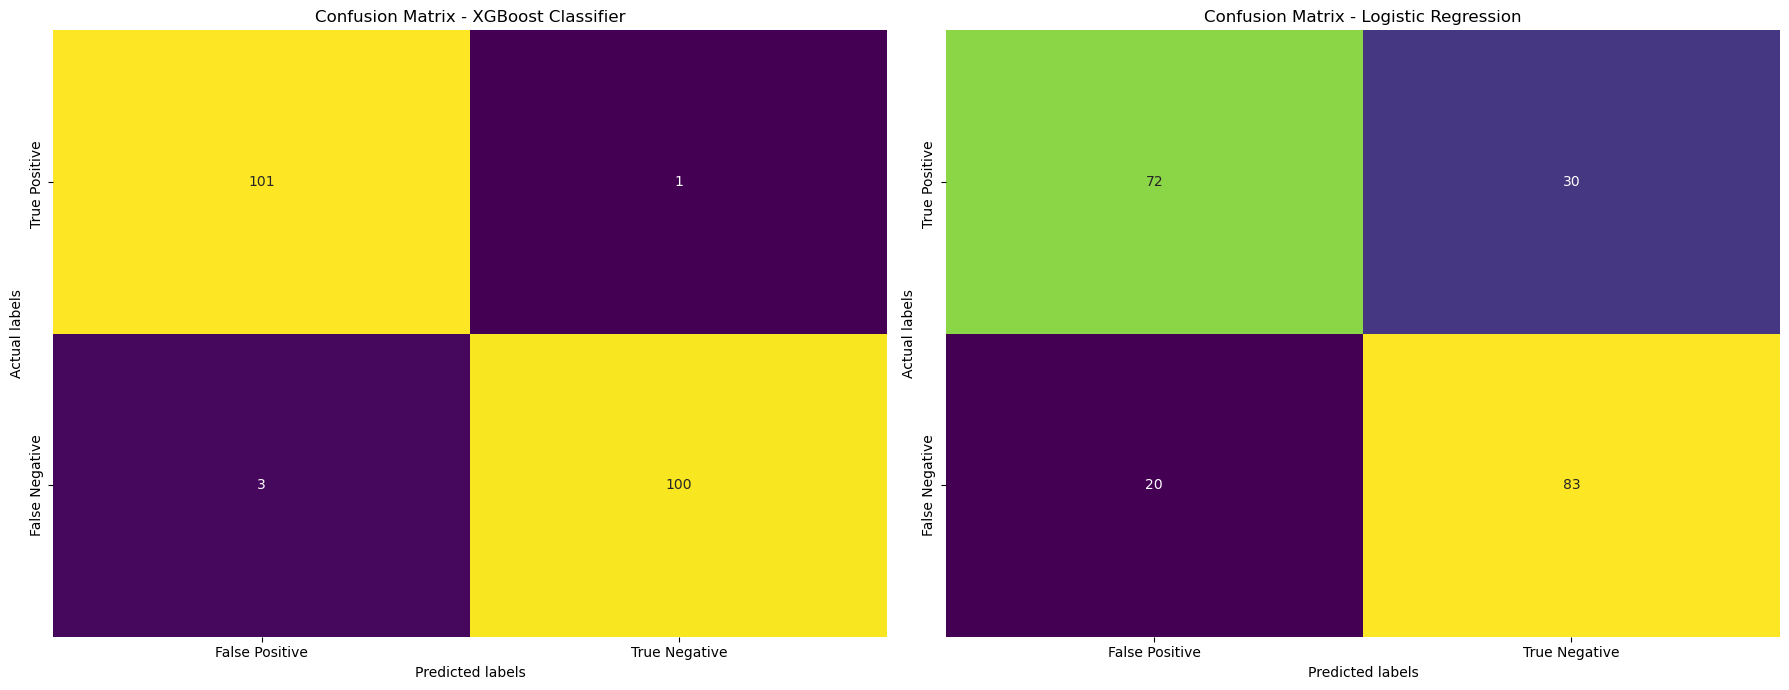

In [161]:
y_true = y_test
y_preds= [xgb_pred, log_pred ]
model_names = ['XGBoost Classifier','Logistic Regression']
plot_confusion_matrix(y_true, y_preds, model_names)

True Positive (TP): The model correctly predicts positive instances as positive.
False Positive (FP): The model incorrectly predicts negative instances as positive.
False Negative (FN): The model incorrectly predicts positive instances as negative.
True Negative (TN): The model correctly predicts negative instances as negative.


### Features Distribution

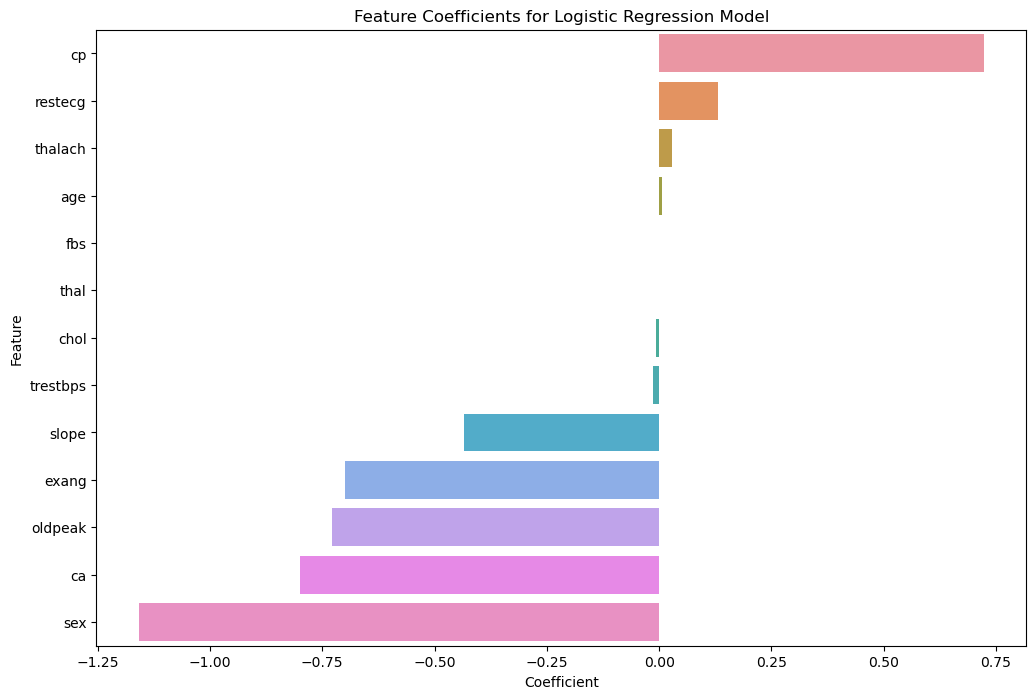

In [162]:
coefficients = log_model.coef_[0]
feature_names = x_train.columns

feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_coefficients)
plt.title('Feature Coefficients for Logistic Regression Model')
plt.show()

### Performance Report

In [163]:
r2_score_xgb = r2_score(y_test, xgb_pred)
mse_xgb = mean_squared_error(y_test, xgb_pred)
mae_xgb = mean_absolute_error(y_test, xgb_pred)


r2_score_log = r2_score(y_test, log_pred)
mse_log = mean_squared_error(y_test, log_pred)
mae_log = mean_absolute_error(y_test, log_pred)


list_r2_score = [r2_score_log, r2_score_xgb,]
list_mse = [mse_log, mse_xgb,]
list_mae = [mae_log, mae_xgb,]


Report = pd.DataFrame(list_r2_score, index=['Logistic Regression','XGBoost Classifier'])
Report.columns =['R2 Score']
Report.insert(loc=1,column='Mean Squared Error',value=list_mse)
Report.insert(loc=2, column='Mean Absolute Error', value=list_mae)

Report.columns.name = 'Algorithm'
print(Report)

Algorithm            R2 Score  Mean Squared Error  Mean Absolute Error
Logistic Regression  0.024367            0.243902             0.243902
XGBoost Classifier   0.921949            0.019512             0.019512


### Classification Report

In [164]:
print(f"XGBoostClassifier \n\n{classification_report(y_test, xgb_pred)}")
print(f"Logistic Regression \n\n{classification_report(y_test, log_pred)}")

XGBoostClassifier 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.99      0.97      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

Logistic Regression 

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       102
           1       0.73      0.81      0.77       103

    accuracy                           0.76       205
   macro avg       0.76      0.76      0.76       205
weighted avg       0.76      0.76      0.76       205



### Conclusion

Based on the metrics, visualizations, and analysis provided, the XGBoost classifier and Logistic Regression , the later emerged as the preferred machine learning model for predicting patient diabetes status. This conclusion is drawn from its higher accuracy of 96%, for XGBoost classifier.